# **GRIP @ The Sparks Foundation**

Task3# : Exploratory Data Analysis - Retail

Author: Ramesh Kori

---

Problem statement: 

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


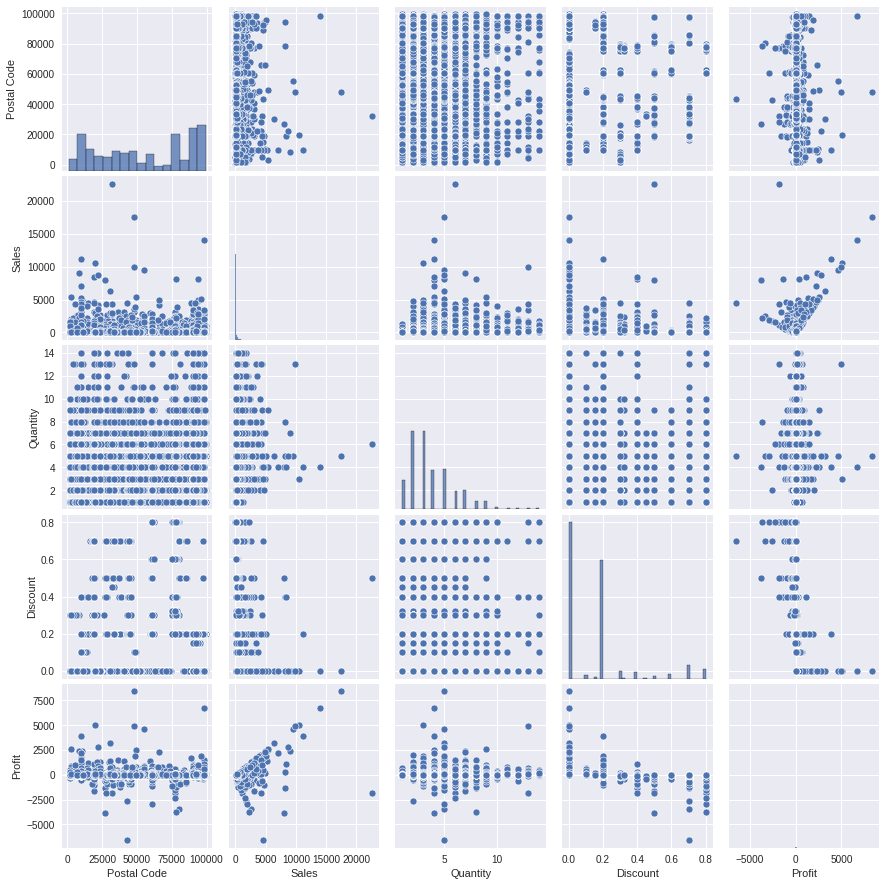

In [27]:
sns.pairplot(data)

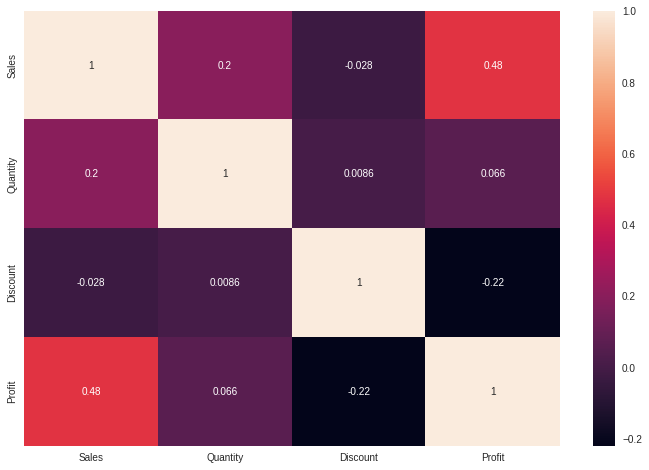

In [28]:
# Dropping the Postal Code
data.drop(['Postal Code'], inplace = True, axis = 1)
data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

* From the above heat map it's clear that the relation between variables is not strong

### Analysing the data based on Region by comparing with Sales, Profit, Discount

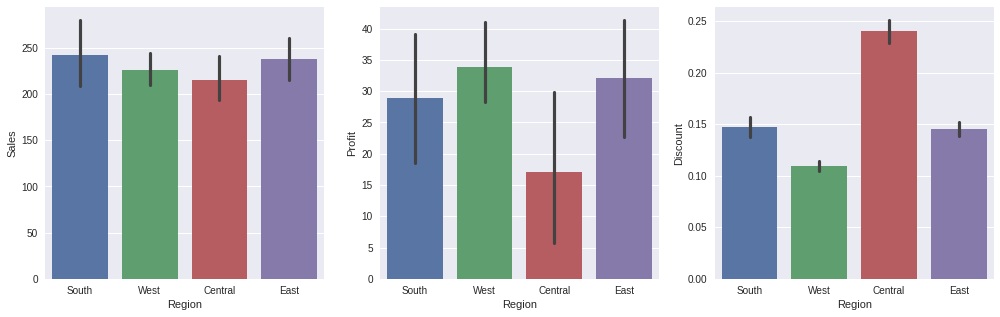

In [29]:
fig, ax =plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Region', y='Sales', data = data, ax = ax[0])
sns.barplot(x='Region', y='Profit', data = data, ax = ax[1])
sns.barplot(x='Region', y='Discount', data = data, ax = ax[2])
plt.show()

* Central region has least Profit and Sales compared to other regions even though provided with high Discount
* West region has highest Profit but with less Discount

### Analyzing the data based on Category by comparing with Sales, Profit and Discount

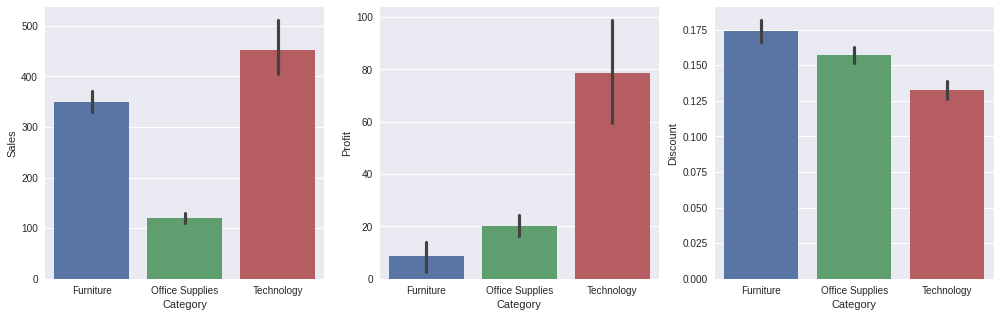

In [30]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Category', y='Sales', data = data, ax = ax[0])
sns.barplot(x='Category', y='Profit', data = data, ax = ax[1])
sns.barplot(x='Category', y='Discount', data = data, ax = ax[2])
plt.show()

* Sales and Profit of Technology Category is high but Discount of Technology Category being less 
* Furniture category least Profit as Discount is high 

Analyzing the data based on Segment by comparing with Sales, Profit and Discount

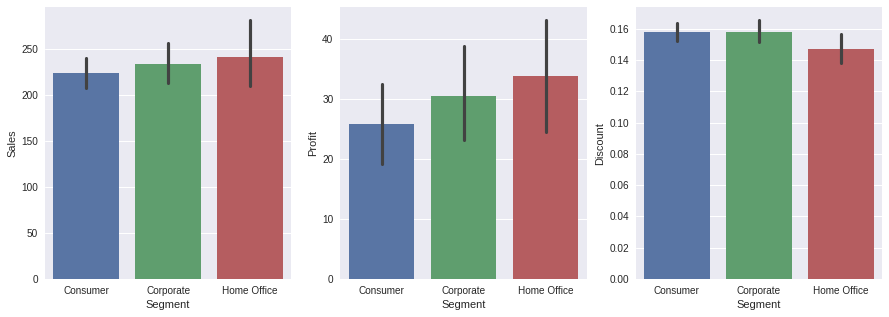

In [31]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Segment', y='Sales', data = data, ax = ax[0])
sns.barplot(x='Segment', y='Profit', data = data, ax = ax[1])
sns.barplot(x='Segment', y='Discount', data = data, ax = ax[2])

* Sales and Profit of Home Office Segment are high as Discount is less

### Analysing the data based on Discount, Sales and Profit

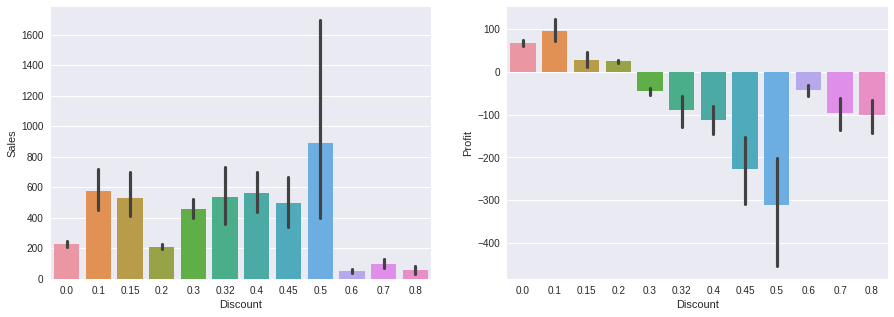

In [32]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Discount', y='Sales', data = data, ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = data, ax = ax[1])

* As Disount is increasing Profits are going into negative and Sales are maximum at 50% Discount

###Number of Quantity in each Sub-Category

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


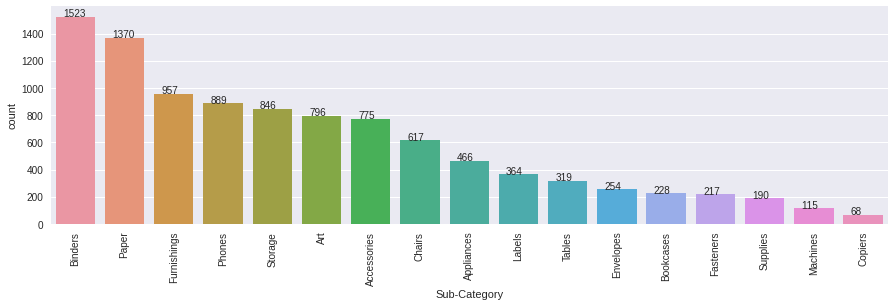

In [33]:
plt.figure(figsize=(15,4))
ax=sns.countplot("Sub-Category", data = data, order = data['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

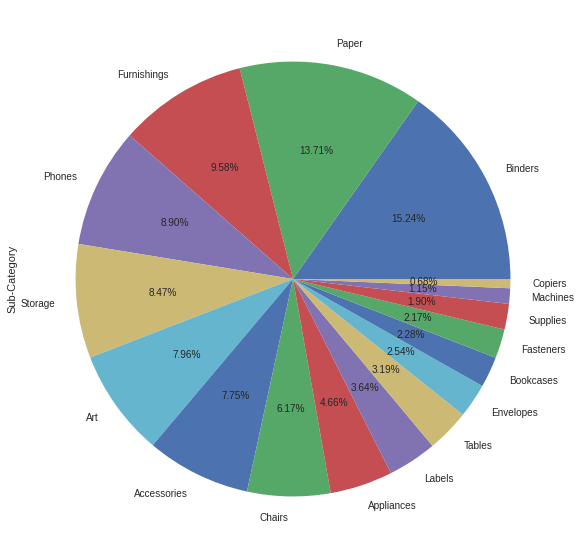

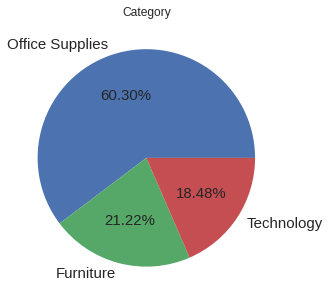

In [34]:
# Total Sub Category by Percentage
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

plt.figure(figsize=(5,5))
textprops ={"fontsize":15}
plt.title('Category')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index, autopct='%1.2f%%', textprops=textprops) 
plt.show()

###Sales based on State

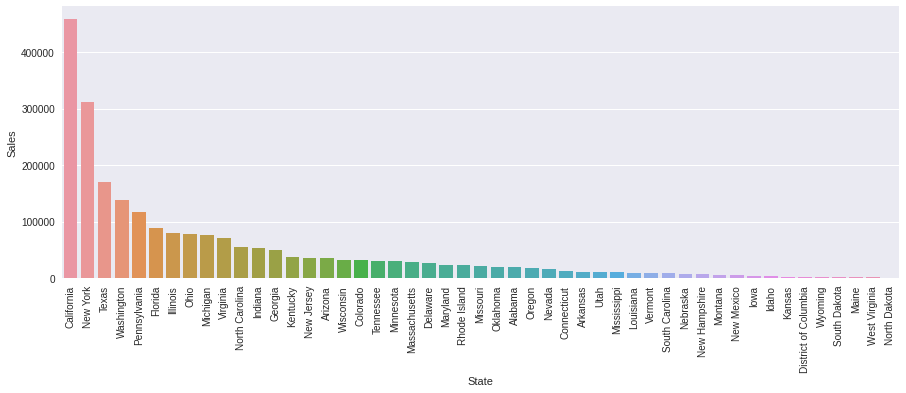

In [35]:
data_state= data.groupby(['State'])[['Sales']].sum().sort_values("Sales", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Sales', data = data_state)
plt.show()

###Profit by State wise

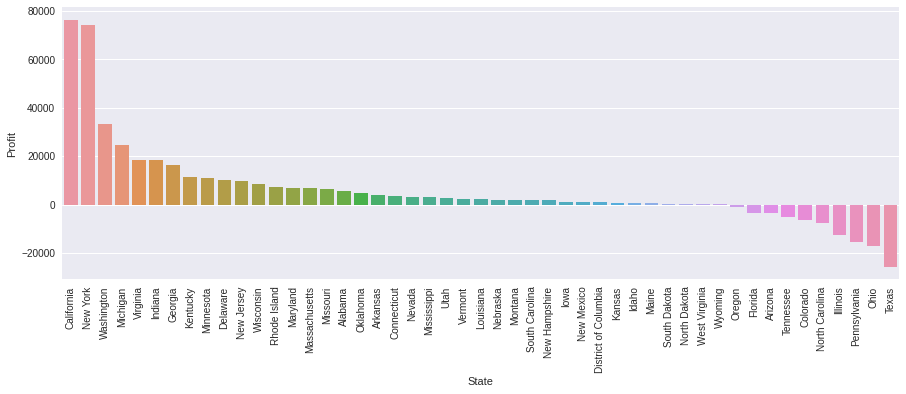

In [36]:
data_state= data.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()

###Sales and Profit across State, sort by Profit

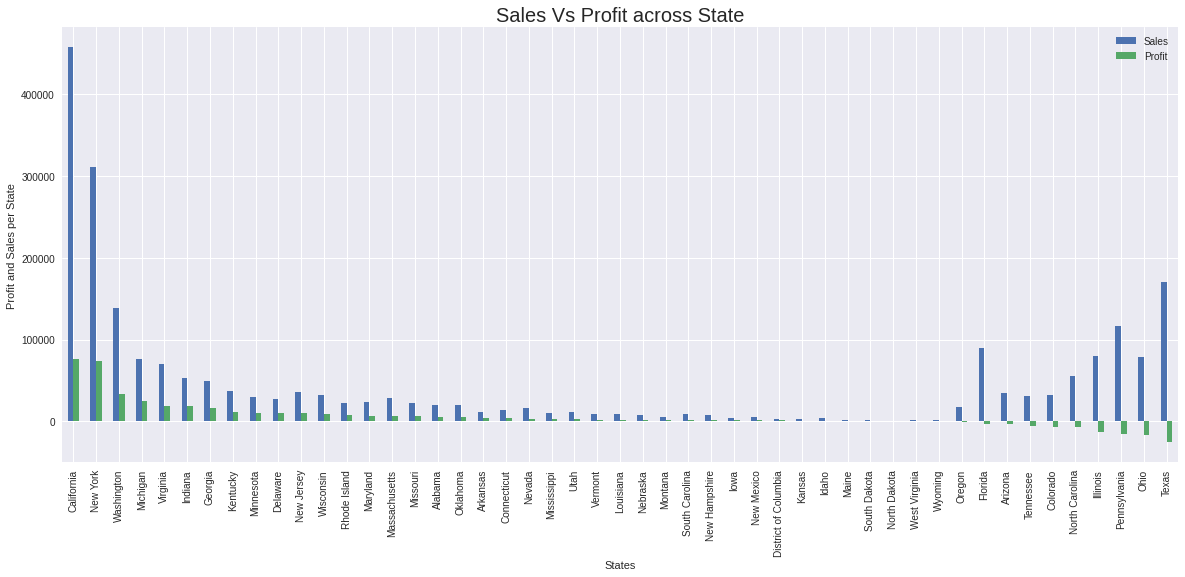

In [37]:
data_state= data.groupby(['State'])[['Sales', 'Profit']].sum()
data_state.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.title('Sales Vs Profit across State', fontsize = 20)
plt.ylabel('Profit and Sales per State')
plt.xlabel('States')
plt.show()

###Profit and Sales across State, Sort by Sales 

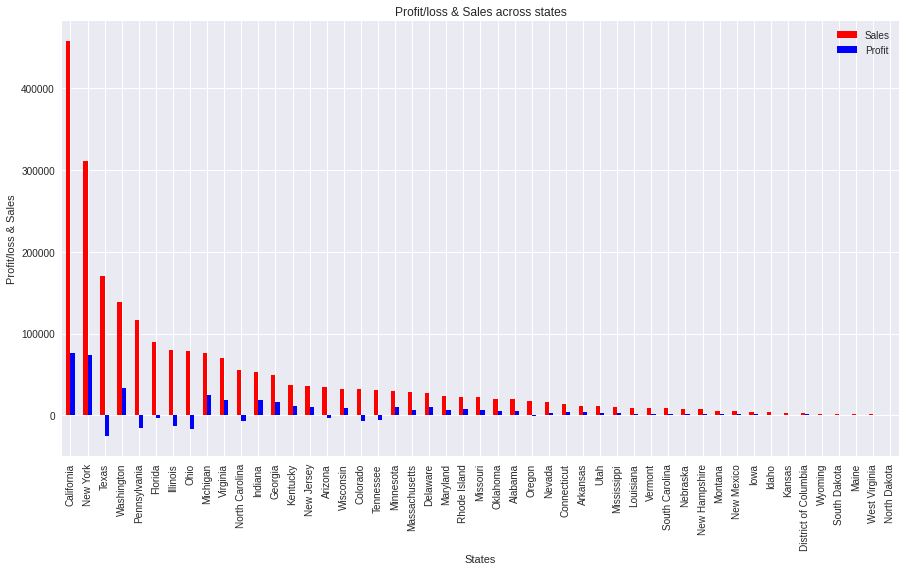

In [38]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales', ascending = False)
ps[:].plot.bar(color=['red','blue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

###Category wise Sales and Profit

<ipython-input-39-d6dbcbea45d1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 720x576 with 0 Axes>

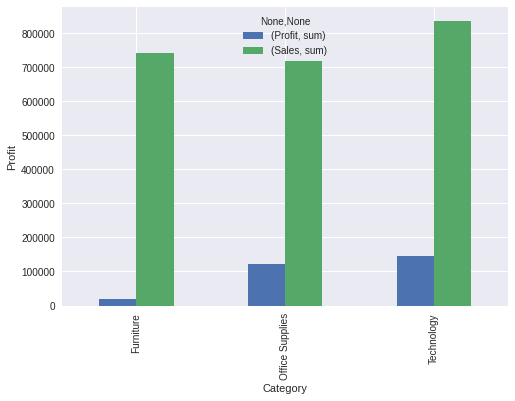

In [39]:
plt.figure(figsize=(10,8))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

###Category wise Sales v/s Profit

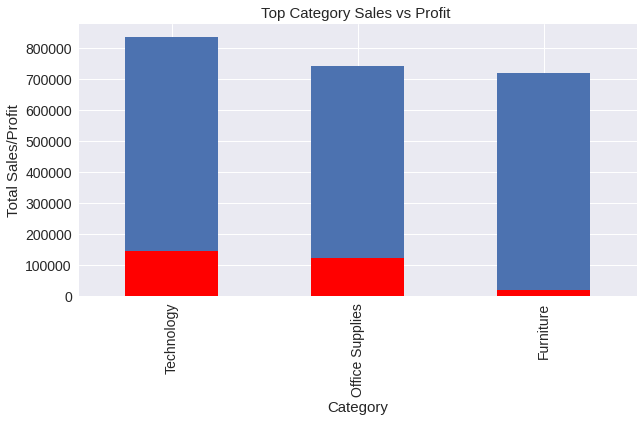

In [40]:
#computing top categories in terms of sales from first 100 observations
top_category_s = data.groupby("Category").Sales.sum().nlargest(n=100)

##computing top categories in terms of profit from first 100 observations
top_category_p = data.groupby("Category").Profit.sum().nlargest(n=100)

#plotting it to see usually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize=(10,5), fontsize=14)
top_category_p.plot(kind = 'bar',figsize=(10,5), fontsize=14,color='red')
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total Sales/Profit', fontsize=15)
plt.title("Top Category Sales vs Profit ", fontsize=15)
plt.show() 

### Profit across Sub Category

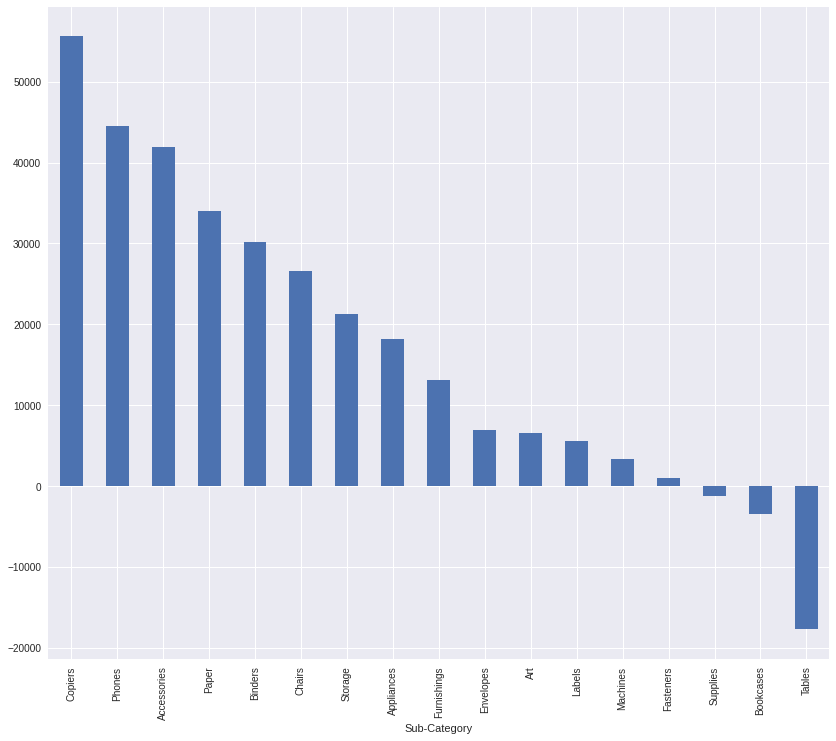

In [41]:
plt.figure(figsize=(14,12))
sc_profit=data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
sc_profit.plot.bar()

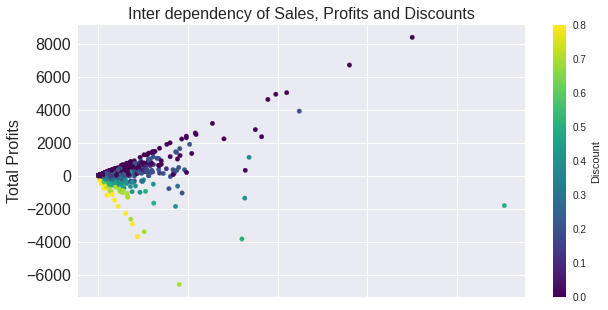

In [42]:
plt.style.use('seaborn')
data.plot(kind="scatter", figsize=(10,5), x="Sales", y="Profit", c="Discount", s=20, fontsize=16, colormap='viridis')
plt.ylabel('Total Profits', fontsize= 16)
plt.title('Inter dependency of Sales, Profits and Discounts', fontsize=16)
plt.show()

## Conclusion:
### 1) As a business manager, try to find out the weak areas where you can work to make more profit.

* Central region has higher Discount but not making much Profit and also sales in the central region is less
* Furniture and Office Supplies are with higher discounts and making less Profit 
* Need to focus on States which are in the loss. Those states which are in loss is listed as Texas, Ohio, Pennsylvania, Illinois, Norh carolina, Colorado, Tennesse, Arizona, Florida, Orgeon
* Sub Categories Tables, Bookcases and Supplies which are in loss are to be more focused


### 2) What all business problems you can derive by exploring the data?
* Increase sales more in the west region as profit is more
*  Discount with less than or equal to 50% is having highest sales and the profit margin
* We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales  
* Considering the sub-categories sales of tables shoud be minimized
* We should concentarte on the states like 'New York' and'California' to make more Profits